In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\lenovo\Desktop\Notebooks\08-Linear-Regression-Models\Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales',axis=1)

In [5]:
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [8]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [16]:
polynomial_features = polynomial_converter.transform(X)

In [17]:
X.shape

(200, 3)

In [18]:
polynomial_features.shape

(200, 9)

In [19]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [21]:
polynomial_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.3, random_state=101)

In [25]:
X_test.shape

(60, 9)

In [26]:
X_train.shape

(140, 9)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
poly_model = LinearRegression()

In [30]:
poly_model.fit(X_train,y_train)

LinearRegression()

In [31]:
poly_model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [32]:
test_prediction = poly_model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [37]:
MAE = mean_absolute_error(y_test,test_prediction)

In [38]:
MAE

0.4896798044803556

In [40]:
MSE = mean_squared_error(y_test,test_prediction)

In [41]:
RMSE = np.sqrt(MSE)

RMSE

In [42]:
RMSE

0.6646431757269032

In [45]:
#ADJUSTING_MODEL_PARAMETERS

In [49]:
train_rmse_eroors = []
test_rmse_eroors = []

for d in range(1,10) :
    polynomial_converter = PolynomialFeatures(degree = d, include_bias=False)
    polynomial_features = polynomial_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.3, random_state=101)
    model = LinearRegression()
    model.fit(X_train,y_train)
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train,train_predict))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_predict))
    train_rmse_eroors.append(train_rmse)
    test_rmse_eroors.append(test_rmse)

In [50]:
train_rmse_eroors

[1.734594124329376,
 0.5879574085292231,
 0.4339344356902068,
 0.3517083688399348,
 0.2509342962728227,
 0.1994556133865361,
 5.418481285535737,
 0.1508621033579802,
 0.17175170448632276]

In [51]:
test_rmse_eroors

[1.516151937599388,
 0.6646431757269032,
 0.5803286825237266,
 0.5077742656422755,
 2.575808121294812,
 4.263812349320766,
 1383.4052620420694,
 3733.4225752445113,
 95489.26452707677]

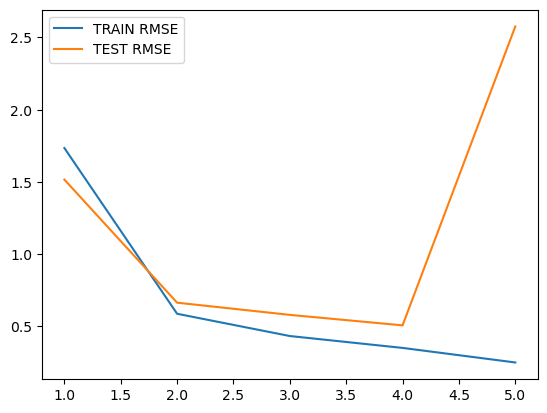

In [55]:
plt.plot(range(1,6),train_rmse_eroors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_eroors[:5],label='TEST RMSE')
plt.legend()

In [56]:
#model_deployment

In [57]:
final_converter = PolynomialFeatures(degree=3,include_bias=False)
full_features = final_converter.fit_transform(X)
model.fit(full_features,y)

LinearRegression()

In [58]:
from joblib import dump,load

In [62]:
dump(model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [63]:
dump(final_converter,'final_poly_conv.joblib')

['final_poly_conv.joblib']

In [65]:
loaded_converter = load('final_poly_conv.joblib')

In [66]:
loaded_model = load('final_poly_model.joblib')

In [67]:
campaign = [[149,22,12]]

In [70]:
coverted =loaded_converter.fit_transform(campaign)

In [71]:
loaded_model.predict(coverted)

array([14.64501014])